# Vanishing Gradient

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization
from keras.models import Sequential

In [2]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

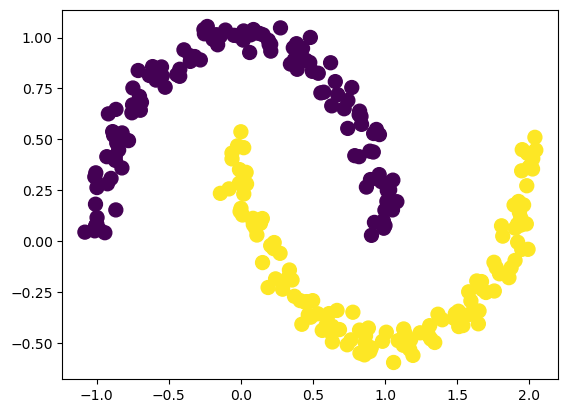

In [3]:
plt.scatter(X[:,0],X[:,1], c=y, s=100)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.get_weights()[0]

array([[ 0.22142708, -0.06187004,  0.50964206, -0.4624868 ,  0.5023183 ,
         0.00841725,  0.6225684 ,  0.13499469, -0.08064175, -0.2239272 ],
       [ 0.01242912, -0.24828538,  0.5339307 , -0.18420297, -0.50335   ,
        -0.3182962 ,  0.2375806 , -0.3241229 ,  0.22466207,  0.20490599]],
      dtype=float32)

In [203]:
old_weights = model.get_weights()[0]

In [205]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 2ms/step - loss: 0.7331 - accuracy: 0.4900
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7220 - accuracy: 0.4900
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.4900
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.4900
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.4900
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4900
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.4900
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4900
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4900
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4900
Epoch 11/100
7/7 [===========

In [206]:
new_weights = model.get_weights()[0]

In [207]:
old_weights

array([[-7.0289916e-01,  3.0691034e-01,  4.7591686e-02, -3.5485268e-01,
         4.8681957e-01,  6.1374396e-01, -4.8208797e-01, -4.9566379e-01,
         8.5163414e-02, -1.6437978e-01],
       [ 9.4737530e-02,  1.8191338e-04, -2.0331573e-01, -6.0318309e-01,
        -5.0321972e-01,  7.9447329e-02, -2.6621103e-02, -3.9470676e-01,
        -3.6707747e-01, -7.0128697e-01]], dtype=float32)

In [208]:
new_weights

array([[-0.71841383,  0.30414176,  0.04279038, -0.3495166 ,  0.4840677 ,
         0.61129063, -0.48371294, -0.4875226 ,  0.08686846, -0.1477196 ],
       [ 0.11006797,  0.00242006, -0.19957267, -0.6074858 , -0.50091374,
         0.08138235, -0.02524103, -0.40139   , -0.36810932, -0.71374214]],
      dtype=float32)

In [209]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [210]:
percent_change

array([[2.2072401e+00, 9.0207982e-01, 1.0088549e+01, 1.5037440e+00,
        5.6527251e-01, 3.9973137e-01, 3.3706951e-01, 1.6424823e+00,
        2.0020840e+00, 1.0135169e+01],
       [1.6182014e+01, 1.2303353e+03, 1.8410121e+00, 7.1332908e-01,
        4.5824605e-01, 2.4356012e+00, 5.1841383e+00, 1.6932141e+00,
        2.8109756e-01, 1.7760440e+00]], dtype=float32)

## Reducing model depth

In [218]:
model_1 = Sequential()

model_1.add(Dense(10,activation='sigmoid',input_dim=2))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(10,activation='sigmoid'))
model_1.add(Dense(1, activation='sigmoid'))

In [219]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [220]:
model_1.get_weights()[0]

array([[ 0.35895306,  0.01876396,  0.48827225,  0.6278977 , -0.5938553 ,
        -0.32556316, -0.29743773, -0.6591821 , -0.03045666,  0.11360681],
       [-0.06662524, -0.68903655, -0.22541669,  0.08418393,  0.22346812,
        -0.20802706,  0.5169036 ,  0.54998225,  0.12159264, -0.02948999]],
      dtype=float32)

In [221]:
old_weights = model_1.get_weights()[0]

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [223]:
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.7090 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [224]:
new_weights = model_1.get_weights()[0]

In [225]:
old_weights

array([[ 0.35895306,  0.01876396,  0.48827225,  0.6278977 , -0.5938553 ,
        -0.32556316, -0.29743773, -0.6591821 , -0.03045666,  0.11360681],
       [-0.06662524, -0.68903655, -0.22541669,  0.08418393,  0.22346812,
        -0.20802706,  0.5169036 ,  0.54998225,  0.12159264, -0.02948999]],
      dtype=float32)

In [226]:
new_weights

array([[ 0.84319   ,  0.3566433 ,  0.72010374,  0.20034228, -1.0252798 ,
         0.3093779 , -0.7876006 , -0.9847023 , -0.5843079 ,  0.7395805 ],
       [-1.0908613 , -1.4657944 , -1.0176843 ,  0.7187598 ,  1.2966318 ,
        -1.2330403 ,  1.5626193 ,  1.478667  ,  1.1403408 , -1.1476904 ]],
      dtype=float32)

In [227]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [228]:
percent_change

array([[ 134.90259 , 1800.6825  ,   47.479965,   68.09316 ,   72.64807 ,
         195.02855 ,  164.79512 ,   49.382442, 1818.4896  ,  551.0002  ],
       [1537.3094  ,  112.73101 ,  351.46808 ,  753.7969  ,  480.23123 ,
         492.73068 ,  202.30383 ,  168.85722 ,  837.83704 , 3791.7961  ]],
      dtype=float32)

## Using ReLU as activation function

In [229]:
model_2 = Sequential()

model_2.add(Dense(10,activation='relu',input_dim=2))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(10,activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

In [230]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [231]:
old_weights = model_2.get_weights()[0]

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [233]:
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 3ms/step - loss: 0.6932 - accuracy: 0.4500
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4800
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4950
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.8400
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.8250
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.8350
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.8550
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.8700
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.9200
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.9350
Epoch 11/100
7/7 [===========

In [234]:
new_weights = model_2.get_weights()[0]

In [235]:
old_weights

array([[ 0.18576896,  0.63383955, -0.29306778,  0.29442436, -0.6361886 ,
         0.31326538, -0.6320419 ,  0.58471674, -0.44894958, -0.44125727],
       [-0.50457704,  0.58985454,  0.4054684 ,  0.07559729,  0.49764925,
        -0.10733604, -0.7015314 , -0.43555734,  0.479446  , -0.3696039 ]],
      dtype=float32)

In [236]:
new_weights

array([[ 2.6167578e-01,  5.8699811e-01, -4.4325316e-01,  2.4029398e-01,
        -5.5773640e-01,  3.7846291e-01, -7.6450843e-01,  6.6542560e-01,
        -5.9425545e-01, -6.1727822e-01],
       [-3.8475201e-01,  6.1554307e-01,  3.5764235e-01,  1.5483019e-01,
         6.1379707e-01,  5.6757068e-04, -5.9658766e-01, -2.8162196e-01,
         6.2647957e-01, -2.4215403e-01]], dtype=float32)

In [237]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [238]:
percent_change

array([[ 40.860867 ,   7.39011  ,  51.245953 ,  18.385155 ,  12.331599 ,
         20.812235 ,  20.95851  ,  13.803071 ,  32.365746 ,  39.890774 ],
       [ 23.74762  ,   4.3550615,  11.795259 , 104.80919  ,  23.339293 ,
        100.52878  ,  14.959238 ,  35.34216  ,  30.66739  ,  34.482826 ]],
      dtype=float32)

## Proper Weight Initialization

In [239]:
model_3 = Sequential()

model_3.add(Dense(10,activation='sigmoid',input_dim=2, kernel_initializer='glorot_normal')) # default Glorot Uniform other options he_normal, he_uniform
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(10,activation='sigmoid'))
model_3.add(Dense(1, activation='sigmoid'))

In [240]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [241]:
model_3.get_weights()[0]

array([[ 0.25226772, -0.1307775 , -0.29876897, -0.31422794,  0.11344498,
         0.12787437, -0.37421912,  0.2776731 ,  0.14533447, -0.1407101 ],
       [ 0.25807434, -0.01557343, -0.26441142, -0.3733162 ,  0.03383704,
         0.54553145, -0.44728947,  0.72248864,  0.15631   ,  0.05533082]],
      dtype=float32)

In [242]:
old_weights = model_3.get_weights()[0]

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [244]:
model_3.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 [==============================] - 2s 2ms/step - loss: 0.7025 - accuracy: 0.5100
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.5100
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5100
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5100
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5100
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5100
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 11/100
7/7 [===========

In [245]:
new_weights = model_3.get_weights()[0]

In [246]:
old_weights

array([[ 0.25226772, -0.1307775 , -0.29876897, -0.31422794,  0.11344498,
         0.12787437, -0.37421912,  0.2776731 ,  0.14533447, -0.1407101 ],
       [ 0.25807434, -0.01557343, -0.26441142, -0.3733162 ,  0.03383704,
         0.54553145, -0.44728947,  0.72248864,  0.15631   ,  0.05533082]],
      dtype=float32)

In [247]:
new_weights

array([[ 0.255401  , -0.14601621, -0.31110987, -0.3290415 ,  0.09360792,
         0.11589987, -0.38274974,  0.2572588 ,  0.15887782, -0.11883219],
       [ 0.25560147, -0.00371835, -0.25454375, -0.36156628,  0.04921326,
         0.5544601 , -0.44055128,  0.7376289 ,  0.14581096,  0.03831011]],
      dtype=float32)

In [248]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [249]:
percent_change

array([[ 1.2420405 , 11.6524    ,  4.1305842 ,  4.714276  , 17.486061  ,
         9.364274  ,  2.279578  ,  7.351916  ,  9.318748  , 15.548213  ],
       [ 0.95820355, 76.123764  ,  3.7319372 ,  3.1474454 , 45.442013  ,
         1.6366897 ,  1.5064486 ,  2.0955672 ,  6.7168097 , 30.761711  ]],
      dtype=float32)

## Batch Normalization

In [287]:
model_4 = Sequential()

model_4.add(Dense(10,activation='sigmoid',input_dim=2, kernel_initializer='glorot_normal')) # default Glorot Uniform
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(10,activation='sigmoid'))
model_4.add(BatchNormalization())
model_4.add(Dense(1, activation='sigmoid'))

In [288]:
model_4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [289]:
model_4.get_weights()[0]

array([[-0.43159938,  0.32077843, -0.1452032 ,  0.41713703, -0.9027567 ,
         0.46520838, -0.38835967, -0.09995155,  0.41555452, -0.03813454],
       [ 0.39744884, -0.02862718,  0.6784736 , -0.11753425,  0.25311816,
         0.28814694,  0.16107614, -0.38621193, -0.39459437, -0.09044993]],
      dtype=float32)

In [290]:
old_weights = model_4.get_weights()[0]

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [292]:
model_4.fit(X_train, y_train, epochs = 100, batch_size=20)

Epoch 1/100
10/10 [==============================] - 5s 3ms/step - loss: 1.1192 - accuracy: 0.3050
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5137 - accuracy: 0.7450
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8400
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8650
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3510 - accuracy: 0.8800
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8550
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8800
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8900
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.9150
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8900
Epoch 11/

In [293]:
new_weights = model_4.get_weights()[0]

In [294]:
old_weights

array([[-0.43159938,  0.32077843, -0.1452032 ,  0.41713703, -0.9027567 ,
         0.46520838, -0.38835967, -0.09995155,  0.41555452, -0.03813454],
       [ 0.39744884, -0.02862718,  0.6784736 , -0.11753425,  0.25311816,
         0.28814694,  0.16107614, -0.38621193, -0.39459437, -0.09044993]],
      dtype=float32)

In [295]:
new_weights

array([[-0.44216463,  0.37198427, -0.12210532,  0.39715594, -0.96736014,
         0.474498  , -0.35052988, -0.08591054,  0.41605017, -0.00761425],
       [ 0.3456933 , -0.04991007,  0.64822394, -0.1327611 ,  0.32824785,
         0.29601684,  0.16371964, -0.3704703 , -0.3591609 , -0.09450956]],
      dtype=float32)

In [296]:
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [297]:
percent_change

array([[ 2.44793   , 15.962996  , 15.907285  ,  4.7900534 ,  7.1562414 ,
         1.9968734 ,  9.740915  , 14.047812  ,  0.11927254, 80.033195  ],
       [13.021939  , 74.34506   ,  4.4584866 , 12.95525   , 29.681667  ,
         2.7312105 ,  1.6411467 ,  4.0759087 ,  8.97972   ,  4.48826   ]],
      dtype=float32)